In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [151]:
titanic = sns.load_dataset('titanic')

In [152]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [153]:
summary = titanic['age'].describe()

In [154]:
summary

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [155]:
five_num = (summary['min'],summary['25%'],summary['50%'],summary['75%'],summary['max'])

In [156]:
print("Five-number summary (Age):",five_num)

Five-number summary (Age): (np.float64(0.42), np.float64(20.125), np.float64(28.0), np.float64(38.0), np.float64(80.0))


In [157]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


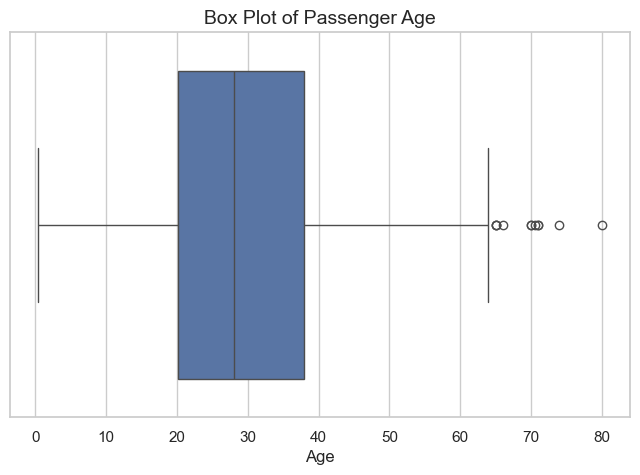

In [158]:
#Create box plot
plt.figure(figsize=(8,5))
sns.boxplot(x=titanic['age'])
#Add titles and labels
plt.title('Box Plot of Passenger Age',fontsize=14)
plt.xlabel('Age')
plt.show()

In [159]:
#Select all numeric columns
numeric_cols = titanic.select_dtypes(include = ['float64','int64']).columns

In [160]:
numeric_cols

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [161]:
sns.set_theme(style='whitegrid')

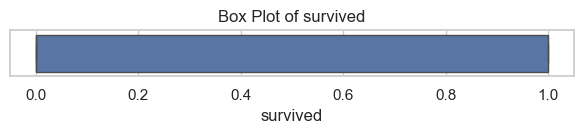

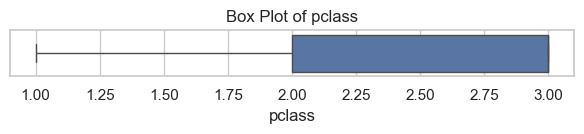

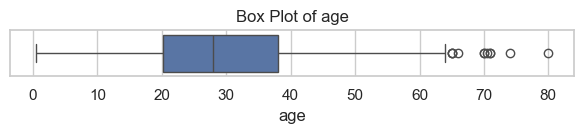

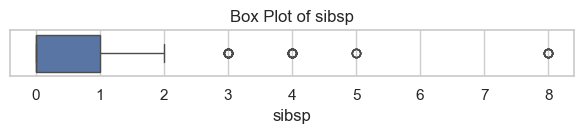

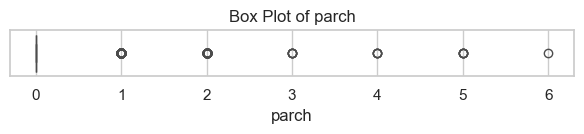

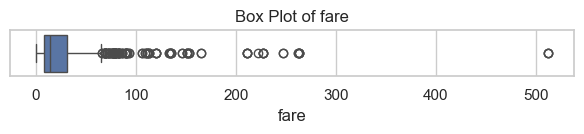

In [162]:
#Plot box plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6,1.5))
    sns.boxplot(x=titanic[col],orient='h')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [163]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [164]:
import seaborn as sns

In [165]:
titanic = sns.load_dataset('titanic')

In [166]:
#Count of male and female passengers
print(titanic['sex'].value_counts())
print(titanic['sex'].value_counts(normalize=True))
print(titanic['sex'].mode()[0])

sex
male      577
female    314
Name: count, dtype: int64
sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64
male


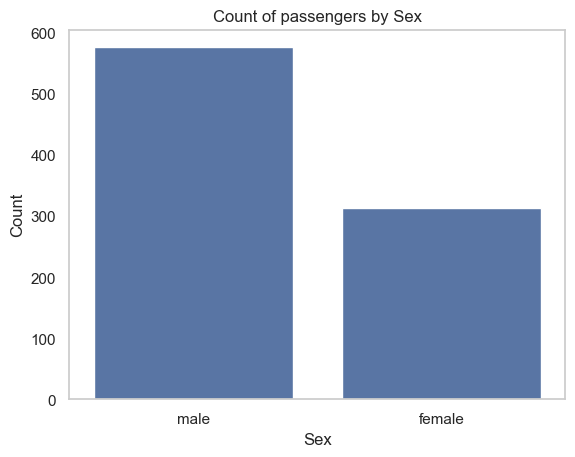

In [167]:
#Countplot (Categorical)
sns.countplot(data=titanic,x='sex')
plt.title('Count of passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

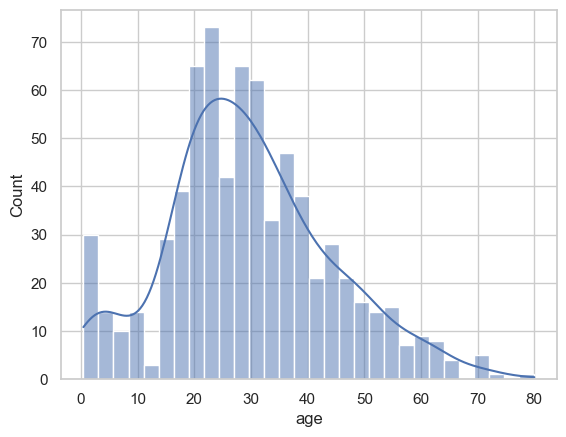

In [168]:
sns.histplot(titanic['age'],bins=30,kde=True)

In [169]:
#Blank

In [170]:
titanic['sex_encoded'] =titanic['sex'].map({'female':0,'male':1})
print(titanic[['sex','sex_encoded']].head())

      sex  sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


In [171]:
from sklearn.preprocessing import LabelEncoder

In [172]:
le = LabelEncoder()

In [173]:
titanic['class_encoded'] = le.fit_transform(titanic['class'])
print(titanic[['class','class_encoded']].head(10))

    class  class_encoded
0   Third              2
1   First              0
2   Third              2
3   First              0
4   Third              2
5   Third              2
6   First              0
7   Third              2
8   Third              2
9  Second              1


In [174]:
from sklearn.preprocessing import OrdinalEncoder

In [175]:
titanic = pd.DataFrame({'class':['Third','First','Second','Third','First']})

In [176]:
titanic

,class
0,Third
1,First
2,Second
3,Third
4,First


In [177]:
encoder = OrdinalEncoder(categories = [['Third','Second','First']])

In [178]:
#Fit and transform
titanic['class_encoded']  = encoder.fit_transform(titanic[['class']])

In [179]:
titanic['class_encoded'] = titanic['class_encoded'].astype(int)

In [180]:
print(titanic)

    class  class_encoded
0   Third              0
1   First              2
2  Second              1
3   Third              0
4   First              2


In [181]:
titanic = sns.load_dataset('titanic')

In [182]:
#One-hot encode 'sex' and 'embarked'
titanic_encoded = pd.get_dummies(titanic,columns=['sex','embarked'],drop_first = True)

In [183]:
titanic_encoded.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,True,False,True
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,False,False,False
2,1,3,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False,False,True
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,False,False,True
4,0,3,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,True,False,True


In [184]:
titanic = sns.load_dataset('titanic')

In [185]:
from sklearn.preprocessing import OneHotEncoder

In [186]:
cols_to_encode = ['sex','embarked']

In [187]:
#Initialize the encoder
ohe = OneHotEncoder(drop='first',sparse_output = False)

In [188]:
encoded_data = ohe.fit_transform(titanic[cols_to_encode])

In [189]:
#Create a new DataFrame with the encoded column names
encoded_df = pd.DataFrame(encoded_data,columns=ohe.get_feature_names_out(cols_to_encode))
#gives meaningful column names based on categories encoded

In [190]:
#Join the original DataFrame (excluded the original categorical columns)
titanic_encoded = pd.concat([titanic.drop(columns=cols_to_encode),encoded_df],axis=1)

In [191]:
#Show the encoded DataFrame
print(titanic_encoded.head())

   survived  pclass   age  sibsp  parch     fare  class    who  adult_male  \
0         0       3  22.0      1      0   7.2500  Third    man        True   
1         1       1  38.0      1      0  71.2833  First  woman       False   
2         1       3  26.0      0      0   7.9250  Third  woman       False   
3         1       1  35.0      1      0  53.1000  First  woman       False   
4         0       3  35.0      0      0   8.0500  Third    man        True   

  deck  embark_town alive  alone  sex_male  embarked_Q  embarked_S  \
0  NaN  Southampton    no  False       1.0         0.0         1.0   
1    C    Cherbourg   yes  False       0.0         0.0         0.0   
2  NaN  Southampton   yes   True       0.0         0.0         1.0   
3    C  Southampton   yes  False       0.0         0.0         1.0   
4  NaN  Southampton    no   True       1.0         0.0         1.0   

   embarked_nan  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [192]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [193]:
titanic = sns.load_dataset('titanic')

In [194]:
#Standarization
scaler = StandardScaler()
titanic[['age','fare']] = scaler.fit_transform(titanic[['age','fare']])
print(titanic[['age','fare']].mean().round(3))
print(titanic[['age','fare']].std().round(3))

age     0.0
fare    0.0
dtype: float64
age     1.001
fare    1.001
dtype: float64


In [195]:
titanic = sns.load_dataset('titanic')

In [196]:
scaler = MinMaxScaler()
titanic[['age_norm','fare_norm']] = scaler.fit_transform(titanic[['age','fare']])
print(titanic[['age_norm','fare_norm']].min().round(3))
print(titanic[['age_norm','fare_norm']].max().round(3))

age_norm     0.0
fare_norm    0.0
dtype: float64
age_norm     1.0
fare_norm    1.0
dtype: float64


In [197]:
titanic = sns.load_dataset('titanic')

In [198]:
median_age = titanic['age'].median()
titanic['age'] = titanic['age'].fillna(median_age)

In [199]:
print(median_age)

28.0


In [200]:
count_before = titanic.shape[0]

In [201]:
titanic = titanic.drop_duplicates()

In [202]:
count_after = titanic.shape[0]

In [203]:
print(f"Removed {count_before-count_after} duplicate rows")

Removed 110 duplicate rows


In [204]:
#IQR Method (Boxplot)

In [206]:
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)

In [207]:
IQR = Q3-Q1

In [210]:
lower_fence = Q1-1.5*IQR

In [211]:
upper_fence = Q3+1.5*IQR

In [212]:
outliers = titanic[(titanic['age']<lower_fence)|(titanic['age']>upper_fence)]

In [213]:
titanic_clean = titanic[(titanic['age']>=lower_fence)|(titanic['age']<=upper_fence)]

In [216]:
print(outliers[['age','fare','survived']])

       age      fare  survived
11   58.00   26.5500         1
33   66.00   10.5000         0
54   65.00   61.9792         0
78    0.83   29.0000         1
94   59.00    7.2500         0
96   71.00   34.6542         0
116  70.50    7.7500         0
170  61.00   33.5000         0
195  58.00  146.5208         1
232  59.00   13.5000         0
252  62.00   26.5500         0
268  58.00  153.4625         1
275  63.00   77.9583         1
280  65.00    7.7500         0
305   0.92  151.5500         1
326  61.00    6.2375         0
366  60.00   75.2500         1
438  64.00  263.0000         0
456  65.00   26.5500         0
469   0.75   19.2583         1
483  63.00    9.5875         1
487  58.00   29.7000         0
493  71.00   49.5042         0
545  64.00   26.0000         0
555  62.00   26.5500         0
570  62.00   10.5000         1
587  60.00   79.2000         1
625  61.00   32.3208         0
630  80.00   30.0000         1
659  58.00  113.2750         0
672  70.00   10.5000         0
684  60.

In [217]:
outliers['age'].count()

np.int64(39)

In [218]:
from scipy.stats import zscore

In [219]:
#Calculate Z-scores for the 'age' column

In [220]:
z_scores = zscore(titanic['age'].dropna()) #Drop NaNs before computing

In [222]:
print(z_scores)

[-0.55415069  0.60899034 -0.26336544  0.39090139  0.39090139 -0.11797281
  1.77213137 -2.00807699 -0.19066912 -1.13572121 -1.86268436  2.06291663
 -0.69954332  0.68168665 -1.13572121  1.84482768 -2.00807699 -0.11797281
  0.10011614 -0.11797281  0.39090139  0.31820508 -1.0630249  -0.11797281
 -1.5718991   0.60899034 -0.11797281 -0.77223964 -0.11797281 -0.11797281
  0.75438297 -0.11797281 -0.11797281  2.64448714 -0.11797281  0.8997756
 -0.11797281 -0.62684701 -0.84493595 -1.13572121  0.75438297 -0.19066912
 -0.11797281 -1.93538067 -0.77223964 -0.11797281 -0.11797281 -0.11797281
 -0.84493595 -1.64459541 -0.62684701  1.4086498  -0.04527649  2.57179083
 -0.11797281 -0.62684701 -0.08162465 -1.78998804 -1.35381015 -0.55415069
  0.60899034  1.11786454 -1.86268436 -0.11797281 -0.11797281 -0.04527649
 -0.77223964 -0.91763227 -0.26336544  0.17281245 -0.99032858 -0.62684701
 -0.26336544  0.17281245 -0.33606175 -2.09313167  0.02741982 -0.55415069
 -0.04527649 -0.11797281 -0.11797281 -0.91763227  0.

In [221]:
#Create mask for absolute z-score < 3

In [223]:
mask = abs(z_scores)<3

In [224]:
titanic_no_outliers= titanic[titanic['age'].notna()].copy()

In [225]:
titanic_no_outliers = titanic_no_outliers[mask]

In [226]:
print(titanic_no_outliers)

     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0           0       3    male  22.0      1      0   7.2500        S  Third   
1           1       1  female  38.0      1      0  71.2833        C  First   
2           1       3  female  26.0      0      0   7.9250        S  Third   
3           1       1  female  35.0      1      0  53.1000        S  First   
4           0       3    male  35.0      0      0   8.0500        S  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
885         0       3  female  39.0      0      5  29.1250        Q  Third   
887         1       1  female  19.0      0      0  30.0000        S  First   
888         0       3  female  28.0      1      2  23.4500        S  Third   
889         1       1    male  26.0      0      0  30.0000        C  First   
890         0       3    male  32.0      0      0   7.7500        Q  Third   

       who  adult_male deck  embark_town alive  alone  
0      

In [227]:
#Numeric vs Numeric

In [228]:
import matplotlib.pyplot as plt

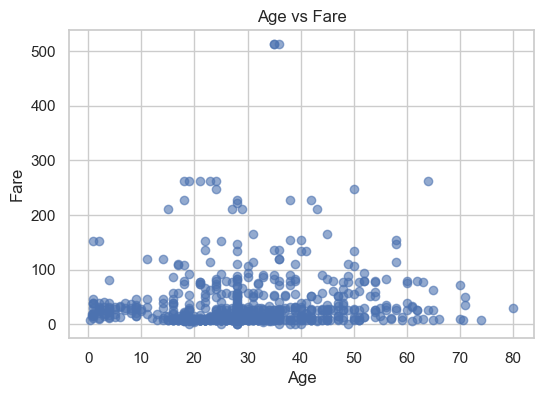

In [230]:
plt.figure(figsize=(6,4))
plt.scatter(titanic['age'],titanic['fare'],alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.grid(True)
plt.show()

In [232]:
#Correlation between just two columns
titanic[['age','fare']].corr()

,age,fare
age,1.000000,0.091575
fare,0.091575,1.000000


In [233]:
#Correlation matrix for all numeric columns
titanic.corr(numeric_only =True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.330755,-0.079430,-0.038368,0.068834,0.246585,-0.527196,-0.174285
pclass,-0.330755,1.000000,-0.343458,0.090002,0.042070,-0.549622,0.064082,0.106902
age,-0.079430,-0.343458,1.000000,-0.279579,-0.183348,0.091575,0.273941,0.191642
sibsp,-0.038368,0.090002,-0.279579,1.000000,0.380806,0.134884,-0.273305,-0.608944
parch,0.068834,0.042070,-0.183348,0.380806,1.000000,0.191747,-0.346200,-0.570526
fare,0.246585,-0.549622,0.091575,0.134884,0.191747,1.000000,-0.164875,-0.246437
adult_male,-0.527196,0.064082,0.273941,-0.273305,-0.346200,-0.164875,1.000000,0.386086
alone,-0.174285,0.106902,0.191642,-0.608944,-0.570526,-0.246437,0.386086,1.000000


In [237]:
titanic = sns.load_dataset('titanic')

<Axes: xlabel='class', ylabel='fare'>

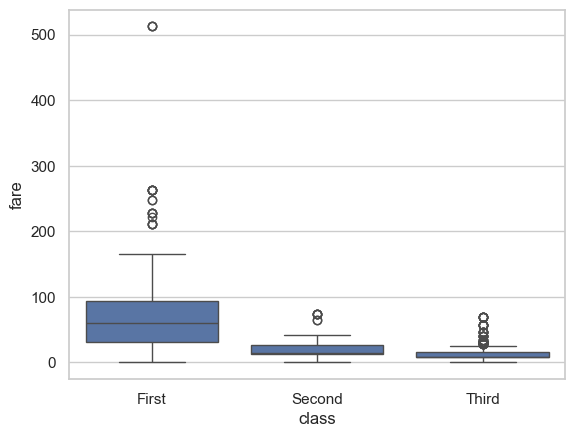

In [238]:
sns.boxplot(x='class',y='fare',data=titanic)

<Axes: xlabel='class', ylabel='fare'>

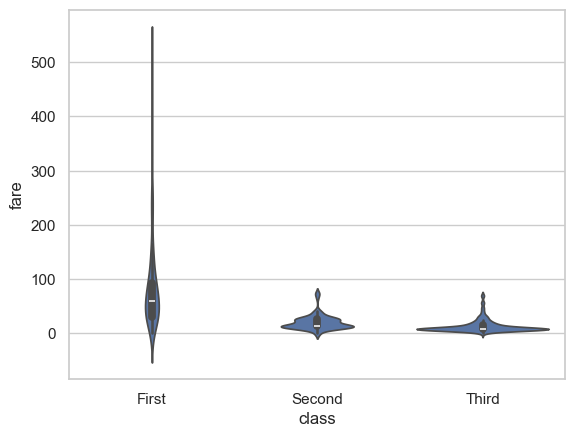

In [239]:
sns.violinplot(x='class',y= 'fare',data=titanic)

<Axes: xlabel='sex', ylabel='age'>

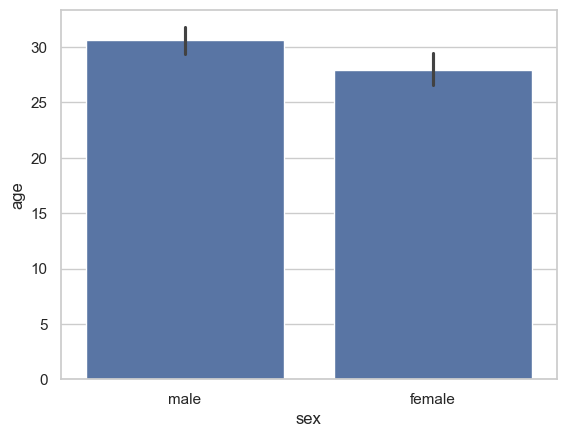

In [236]:
sns.barplot(x='sex',y='age',data= titanic)

In [240]:
titanic.groupby('class')['fare'].mean()

C:\Users\william.bai\AppData\Local\Temp\ipykernel_39332\2604568842.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('class')['fare'].mean()


class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [242]:
from scipy.stats import ttest_ind
titanic = sns.load_dataset('titanic').dropna(subset =['age'])
survivors = titanic.loc[titanic['survived']==1,'age']
nonsurvivors = titanic.loc[titanic['survived']==0,'age']

In [245]:
t_stat,p_val = ttest_ind(survivors,nonsurvivors,equal_var=False)

In [247]:
print('t_stat:',t_stat)
print('p_val',p_val)

t_stat: -2.0460301043939704
p_val 0.04118965162586639


In [259]:
titanic = sns.load_dataset('titanic').dropna(subset = ['age'])

In [260]:
from scipy.stats import f_oneway
class1 = titanic.loc[titanic['pclass']==1,'age']
class2 = titanic.loc[titanic['pclass']==2,'age']
class3 = titanic.loc[titanic['pclass']==3,'age']

In [262]:
F_stat,p_val = f_oneway(class1,class2,class3)
print("F-statistic:",F_stat)
print('p-value:',p_val)


F-statistic: 57.44348434067624
p-value: 7.487984171959212e-24


In [263]:
titanic = sns.load_dataset('titanic').dropna()

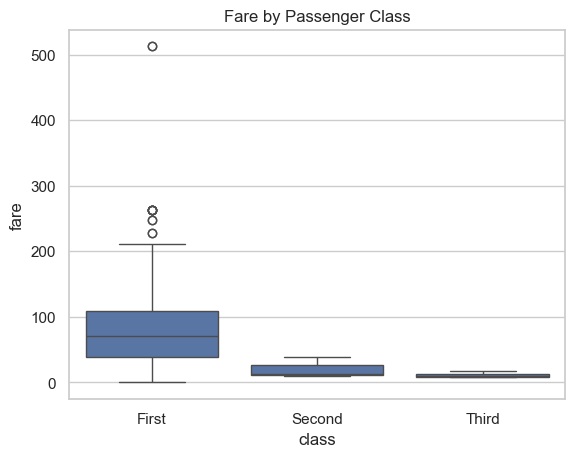

In [265]:
sns.boxplot(x='class',y='fare',data=titanic)
plt.title('Fare by Passenger Class')
plt.show()

In [266]:
print(titanic.groupby('class')['fare'].mean())

class
First     89.021975
Second    18.444447
Third     11.027500
Name: fare, dtype: float64


C:\Users\william.bai\AppData\Local\Temp\ipykernel_39332\61398063.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic.groupby('class')['fare'].mean())


In [268]:
titanic = sns.load_dataset('titanic')

In [269]:
#Basic crosstab
table = pd.crosstab(titanic['sex'],titanic['survived'])
print(table)

survived    0    1
sex               
female     81  233
male      468  109


In [270]:
#Normalize = 'index' -> Row-wise percentage (within sex)
pd.crosstab(titanic['sex'],titanic['survived'],normalize='index')

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [271]:
#Normalize ='columns' -> Column-wise percentage (within survival status)
pd.crosstab(titanic['sex'],titanic['survived'],normalize='columns')

survived,0,1
sex,,
female,0.147541,0.681287
male,0.852459,0.318713


In [272]:
survival_rate = titanic.groupby('sex')['survived'].mean()

<Axes: title={'center': 'Survival Rate by Sex'}, xlabel='sex'>

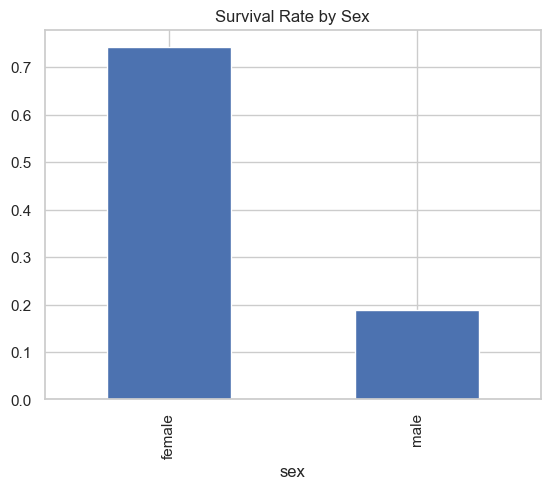

In [274]:
survival_rate.plot(kind='bar',title='Survival Rate by Sex')